Analysing whether handwashing in clinics (introduced by Dr. Semmelweis) affects the proportion of deaths in childbirth

In [1]:
# importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# read yearly deaths data and asign to dataframe yearly
yearly = pd.read_csv('/workspaces/codespaces-jupyter/data/yearly_deaths_by_clinic.csv')

# add column to show proportion of deaths
yearly['proportion_death'] = yearly['deaths'] / yearly['births']

# split yearly data by clinic
clinic_1 = yearly[yearly['clinic'] == 'clinic 1']
clinic_2 = yearly[yearly['clinic'] == 'clinic 2']

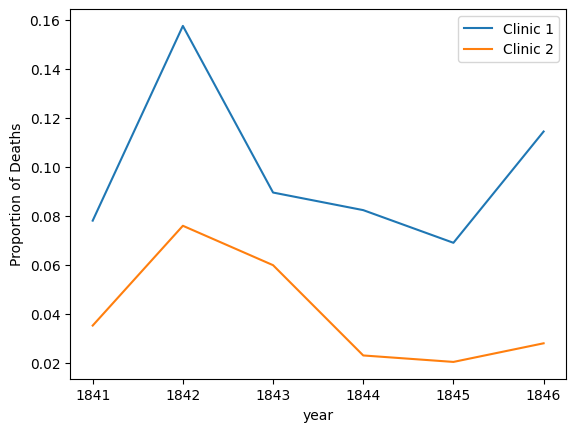

In [6]:
# plot the proportion of deaths in each clinic on the same axis
ax = clinic_1.plot(x='year', y='proportion_death', label='Clinic 1')
clinic_2.plot(x='year', y='proportion_death', label = 'Clinic 2', ax=ax, ylabel='Proportion of Deaths')
plt.show()

As the graph shows a much higher rate in Clinic 1, let's examine monthly data for this clinic.

In [7]:
# read monthly dataset as a dataframe and add column for proportion of deaths
monthly = pd.read_csv('/workspaces/codespaces-jupyter/data/monthly_deaths.csv', parse_dates=['date'])
monthly['proportion_death'] = monthly['deaths']/monthly['births']
monthly.head()

,date,births,deaths,proportion_death
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


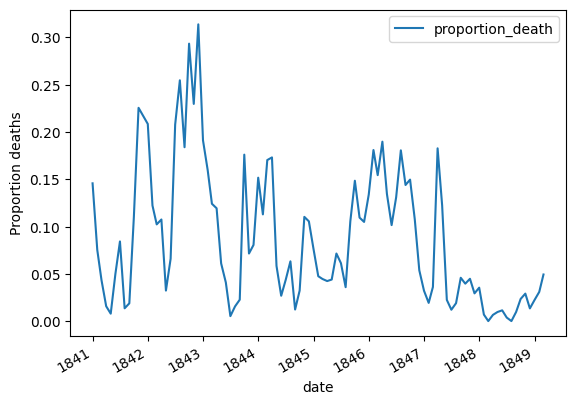

In [8]:
# plot monthly proportion of deaths
ax = monthly.plot(x='date', y='proportion_death', ylabel='Proportion deaths')
plt.show()

Starting from the summer of 1847 the proportion of deaths is drastically reduced and, yes, this was when Semmelweis made handwashing obligatory.

The effect of handwashing is made even more clear if we highlight this in the graph.

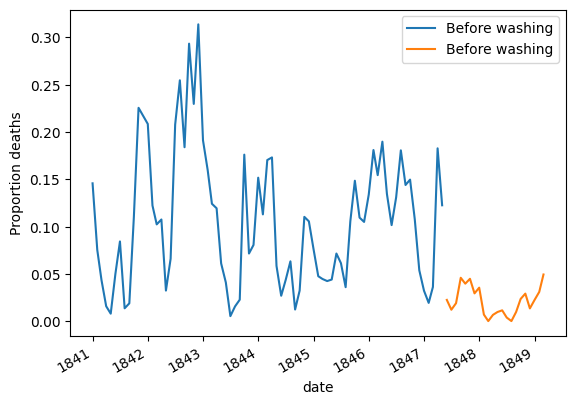

In [9]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly['date'] < handwashing_start]
after_washing = monthly[monthly['date'] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x='date', y='proportion_death', label='Before washing')
after_washing.plot(x='date', y='proportion_death', label='Before washing', ax=ax, ylabel='Proportion deaths')
plt.show()

In [11]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing['proportion_death']
after_proportion = after_washing['proportion_death']
mean_diff = after_proportion.mean() - before_proportion.mean() 
mean_diff

-0.08395660751183336

In [12]:
# A bootstrap analysis of the reduction of deaths due to handwashing
import numpy as np
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(np.mean(boot_before) - np.mean(boot_after))

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025    0.067505
0.975    0.102308
dtype: float64

So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.